In [1]:
import importlib
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../../')

import astroLuSt.synthetics.images as alsyim
from astroLuSt.styles import plot_styles as alstps

importlib.reload(alsyim)
importlib.reload(alstps)

#style for plotting
_ = alstps.tre_light()

# Generate "Stars" on a "Sky Background"

## Driven by Fluxes

/home/lukas/github/astroLuSt/demos/synthetics/../../astroLuSt/physics/photometry.py:385: RuntimeWarning: divide by zero encountered in log10
  m = -2.5*np.log10(f/f_ref) + m_ref
/home/lukas/github/astroLuSt/demos/synthetics/../../astroLuSt/physics/photometry.py:388: RuntimeWarning: divide by zero encountered in divide
  dm =  df     *np.abs(-2.5*1/(np.log(10)*f)) \
/home/lukas/github/astroLuSt/demos/synthetics/../../astroLuSt/physics/photometry.py:388: RuntimeWarning: invalid value encountered in multiply
  dm =  df     *np.abs(-2.5*1/(np.log(10)*f)) \
/home/lukas/github/astroLuSt/demos/synthetics/../../astroLuSt/physics/photometry.py:388: RuntimeWarning: overflow encountered in divide
  dm =  df     *np.abs(-2.5*1/(np.log(10)*f)) \


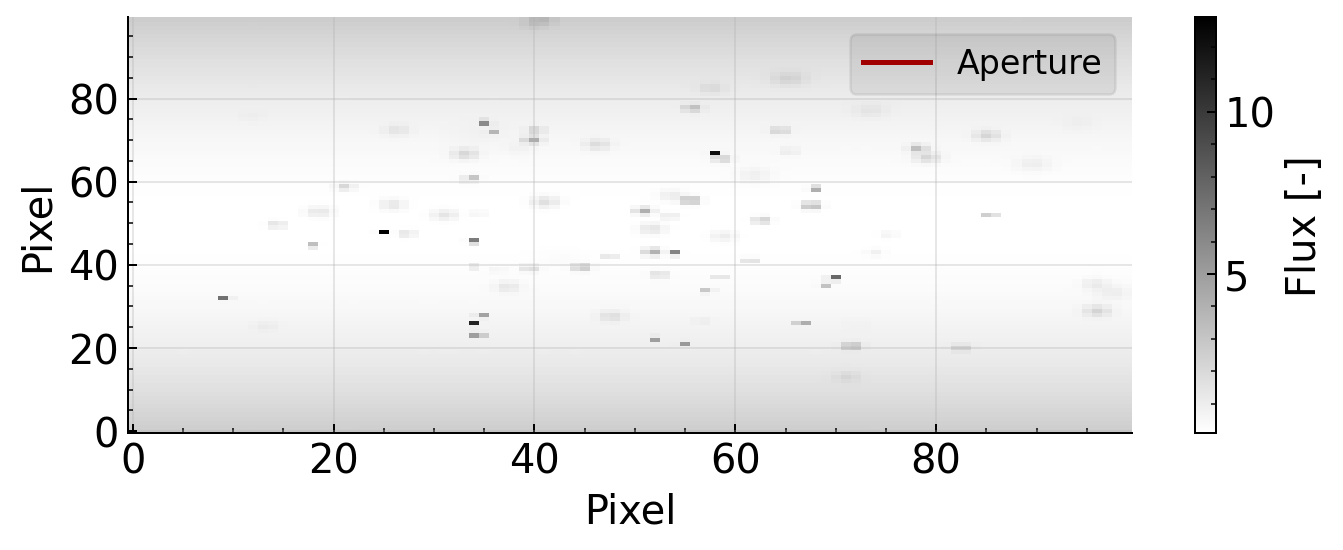

In [2]:
importlib.reload(alsyim)

#using the TPF.rvs to do all at once
TPF = alsyim.TPF(
    size=100,
    mode='flux',
    # mode='mag',
    f_ref=1, m_ref=0,
    store_stars=True,
    rng=None,
    verbose=0,
)

frame = TPF.rvs(
    shape=None,
    add_stars_kwargs=dict(
        nstars=100,
        posx={'dist':'normal', 'params':{'loc':50, 'scale':20}},
        posy={'dist':'normal', 'params':{'loc':50, 'scale':20}},
        f={'dist':'uniform', 'params':{'low':1,'high':10}},
        # m={'dist':'uniform', 'params':{'low':-4,'high':4}},
        aperture={'dist':'poisson', 'params':{'lam':2}},
    ),
    add_noise_kwargs=dict(
        amplitude=1E-1, bias=1E-1
    ),
    add_custom_kwargs=dict(
        trend=np.linspace(-50,np.ones((100))*50,100)**2, amplitude=1E-3
        # trend="linearx"
    )
)

fig = plt.figure(figsize=(9,3))
fig, axs = TPF.plot_result(fig=fig)


TPF(
    size=(100, 100),
    mode='flux',
    f_ref=1, m_ref=0,
    store_stars=True,
    rng='Generator',
    verbose=0,
)


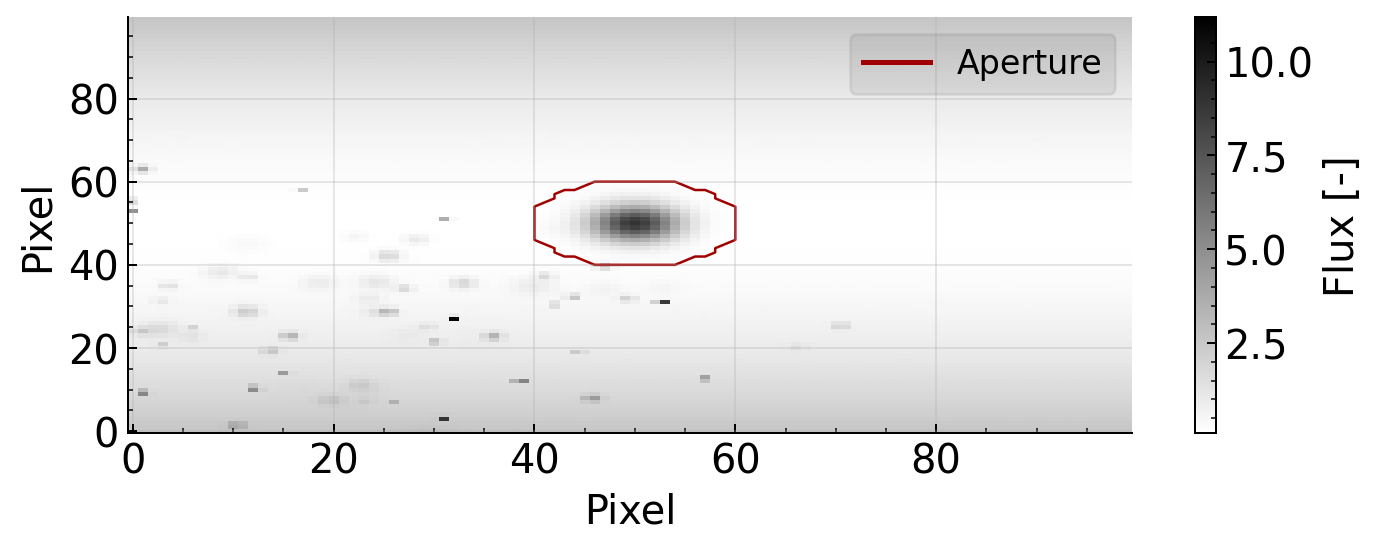

Estimated Aperture: 10


In [3]:
importlib.reload(alsyim)

#using individual building blocks
TPF = alsyim.TPF(
    size=100,
    mode='flux',
    # mode='mag',
    f_ref=1, m_ref=0,
    store_stars=True,
    rng=None,
    verbose=0,
)
print(TPF)

#random stars (distribution specified via dict)
TPF.add_stars(
    nstars=100,
    posx={'dist':'normal', 'params':{'loc':20, 'scale':20}},
    posy={'dist':'normal', 'params':{'loc':20, 'scale':20}},
    f={'dist':'uniform', 'params':{'low':1,'high':10}},
    # m={'dist':'uniform', 'params':{'low':-4,'high':4}},
    aperture={'dist':'poisson', 'params':{'lam':2}},
)
#specified stars
TPF.add_stars(
    nstars=1,
    posx=np.array([50]),
    posy=np.array([50]),
    f=np.array([500]),
    m=None,
    aperture=np.array([10]),
)
#custom (quadratic) trend
TPF.add_custom(np.linspace(-50,np.ones((100))*50,100)**2, amplitude=1E-3)

#noise
TPF.add_noise(amplitude=1E-1, bias=1E-1)

#plot (including last aperture)
fig = plt.figure(figsize=(9,3))
fig, axs = TPF.plot_result(fig=fig, plot_apertures=[-1])
plt.show()

#estimate aperture
try:
    print(f'Estimated Aperture: {TPF.aperture_from_mask(TPF.stars[-1,:,:,2]):.0f}')
except:
      pass

## Driven by Magnitudes

TPF(
    size=(100, 100),
    mode='mag',
    f_ref=1, m_ref=0,
    store_stars=True,
    rng='Generator',
    verbose=0,
)
Estimated Aperture: 10
[ 50.          50.         630.95734448  -7.          10.        ]


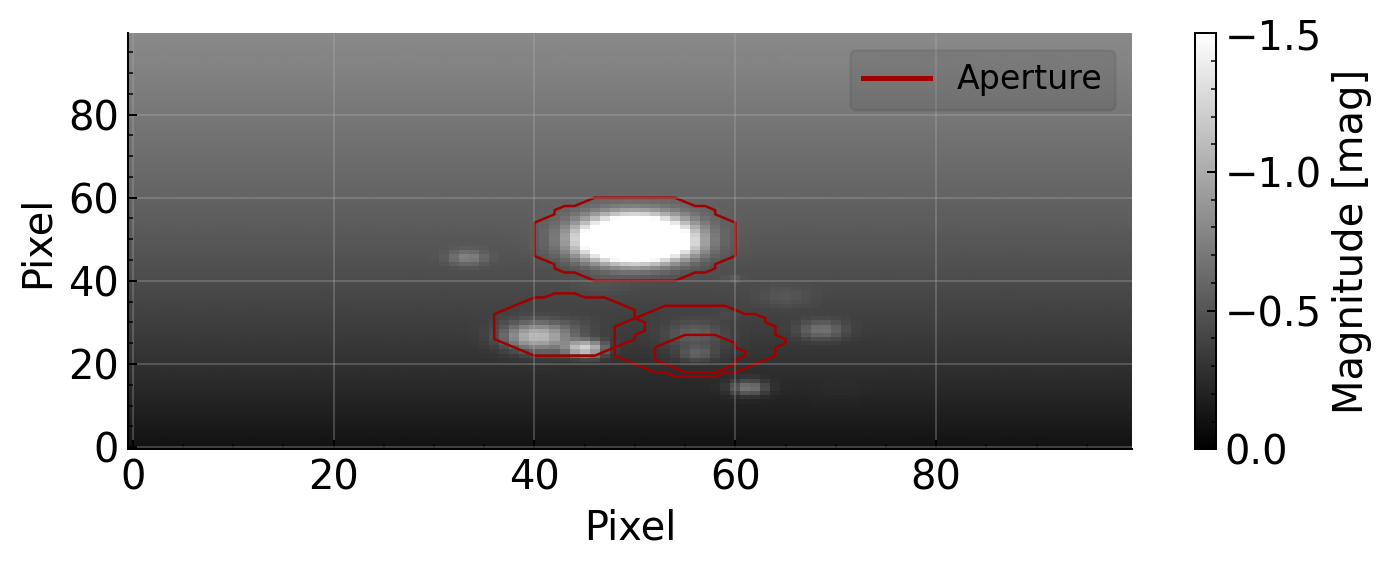

In [4]:
importlib.reload(alsyim)

TPF = alsyim.TPF(
    size=100,
    # mode='flux',
    mode='mag',
    f_ref=1, m_ref=0,
    store_stars=True,
    rng=None,
    verbose=0
)
print(TPF)

#random stars (distribution specified via list)
TPF.add_stars(
    nstars=30,
    posx={'dist':'chisquare', 'params':[50]},
    posy={'dist':'chisquare', 'params':[30]},
    # f={'dist':'uniform', 'params':[1,10]},
    m={'dist':'uniform', 'params':[-4,4]},
    aperture={'dist':'poisson', 'params':[5]},
)
#specified stars
TPF.add_stars(
    nstars=1,
    posx=np.array([50]),
    posy=np.array([50]),
    # f=np.array([500]),
    m=np.array([-7]),
    aperture=np.array([10]),
)

#custom (linear) trend
TPF.add_custom('lineary', amplitude=1)

#noise
TPF.add_noise(amplitude=5E-2, bias=1E-1)


#plot (including multiple apertures)
# fig, axs = TPF.plot_result(plot_apertures=range(-4,0,1))
fig = plt.figure(figsize=(9,3))
fig, axs = TPF.plot_result(plot_apertures=range(-4,0,1), fig=fig, pcolormesh_kwargs=dict(vmin=-1.5, vmax=0))

try:
    print(f'Estimated Aperture: {TPF.aperture_from_mask(TPF.stars[-1,:,:,2]):.0f}')
except:
    pass
print(TPF.starparams[-1])

## Generating Movies of Stars on Silicon

### Example for Magnitudes

MovieWriter ffmpeg unavailable; using Pillow instead.


TPF_Series(
    size=(15, 15),
    mode='mag',
    f_ref=1, m_ref=0,
    rng='Generator',
    verbose=0,
)



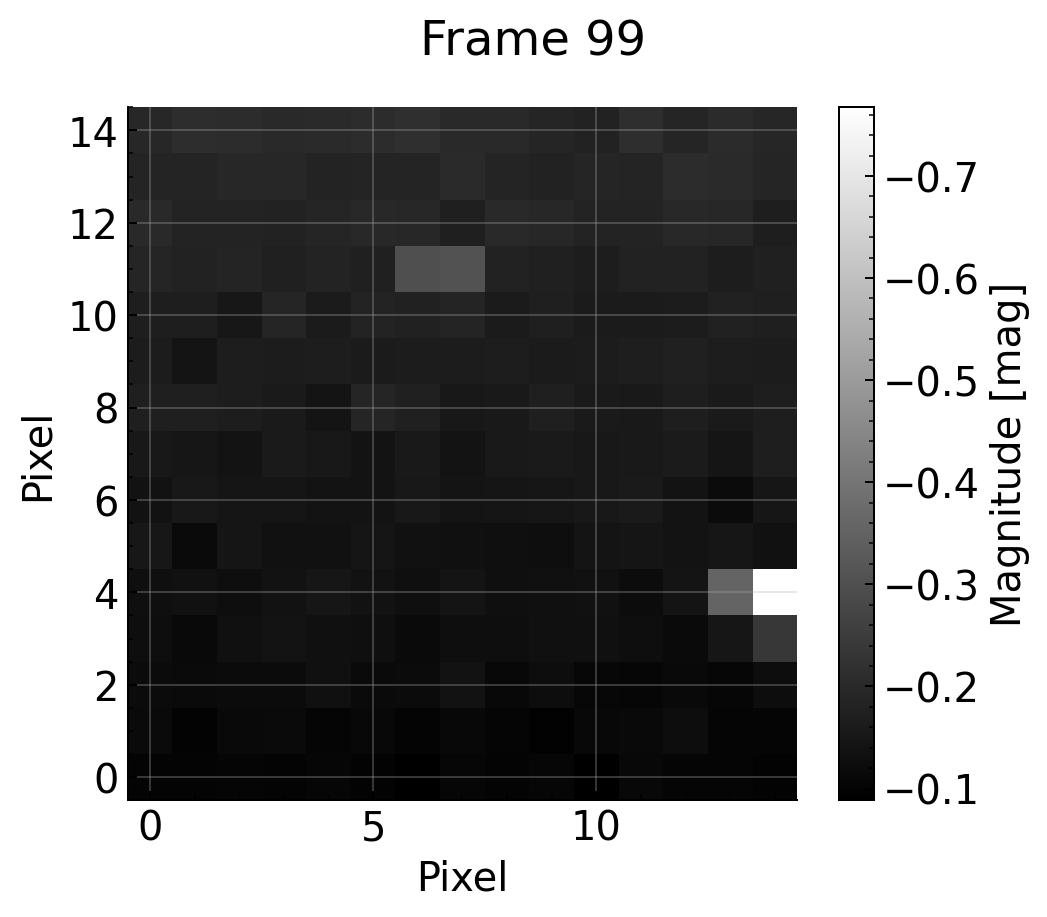

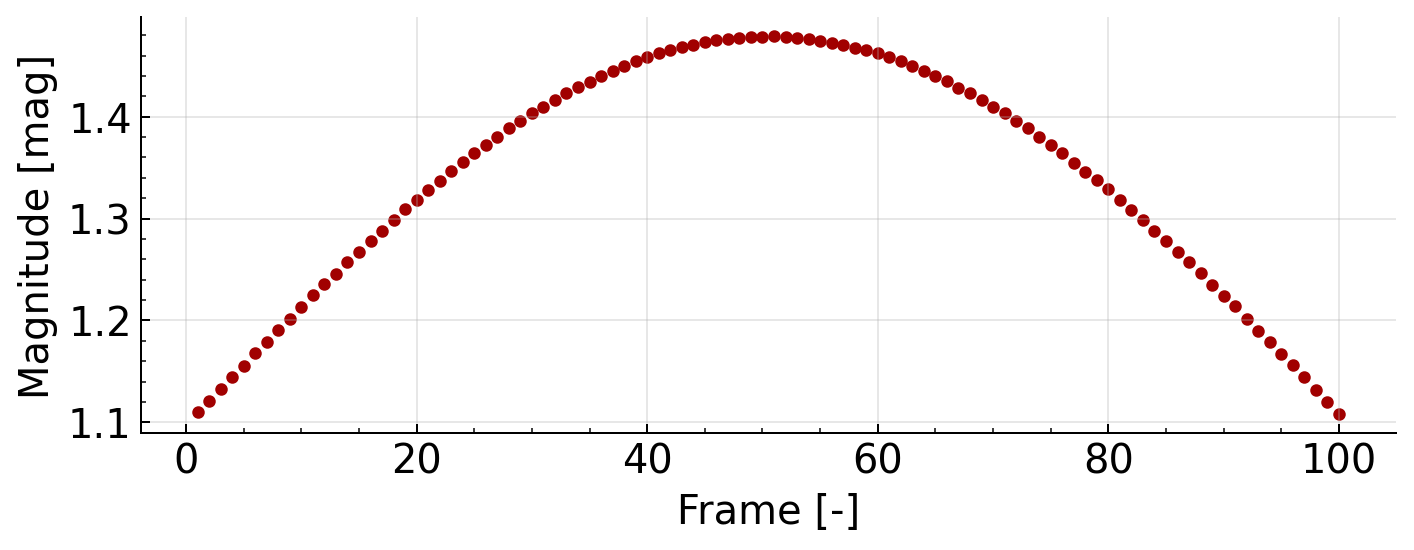

In [5]:
importlib.reload(alsyim)

#define variability of magnitudes over time
def mf_var(tp, fm):
    period = 200
    amp    = 2
    rperiods = np.random.uniform(40, 50, size=fm[:-1].shape)
    ramps    = np.random.uniform(.1, 1,  size=rperiods.shape)
    
    fm[-1]  *= amp*(np.sin(2*np.pi*tp/period)+3) + 2E-3*np.random.randn()
    fm[:-1] *= ramps*(np.sin(2*np.pi*tp/rperiods)+2) + 1E-3*np.random.randn(*fm[:-1].shape)

    return fm

times = np.linspace(0,100,100)

TPFS = alsyim.TPF_Series(
    size=15,
    # mode='flux',
    mode='mag',
    f_ref=1, m_ref=0,
    rng=None,
    verbose=0    
)
print(TPFS)


frames, starparams_s = TPFS.rvs(
    times=times,
    variability=mf_var,
    add_stars_kwargs=dict(
        nstars=2,
        m={'dist':'uniform', 'params':[-0.5, 0.5]},
        aperture={'dist':'uniform', 'params':[1, 1.5]},
    ),
    add_noise_kwargs=dict(amplitude=1, bias=1),
    add_custom_kwargs=dict(trend='lineary', amplitude=1E-1),
)

fig, axs, anim = TPFS.plot_result(
    save='../_gfx/tpfseries_mag.gif',
    # pcolormesh_kwargs=dict(vmin=-.5, vmax=-.1),
    save_kwargs=dict(fps=10)
)


#plot pure star LC of last target (variability)
fig = plt.figure(figsize=(9,3))
ax1 = fig.add_subplot(111)
ax1.scatter(starparams_s[:,-1,-1], starparams_s[:,-1,3])
ax1.set_xlabel('Frame [-]')
ax1.set_ylabel('Magnitude [mag]')
plt.show()

### Example for Fluxes

TPF_Series(
    size=(100, 100),
    mode='flux',
    f_ref=1, m_ref=0,
    rng='Generator',
    verbose=0,
)



/home/lukas/github/astroLuSt/demos/synthetics/../../astroLuSt/physics/photometry.py:385: RuntimeWarning: divide by zero encountered in log10
  m = -2.5*np.log10(f/f_ref) + m_ref
/home/lukas/github/astroLuSt/demos/synthetics/../../astroLuSt/physics/photometry.py:388: RuntimeWarning: divide by zero encountered in divide
  dm =  df     *np.abs(-2.5*1/(np.log(10)*f)) \
/home/lukas/github/astroLuSt/demos/synthetics/../../astroLuSt/physics/photometry.py:388: RuntimeWarning: invalid value encountered in multiply
  dm =  df     *np.abs(-2.5*1/(np.log(10)*f)) \
/home/lukas/github/astroLuSt/demos/synthetics/../../astroLuSt/physics/photometry.py:388: RuntimeWarning: overflow encountered in divide
  dm =  df     *np.abs(-2.5*1/(np.log(10)*f)) \
/tmp/ipykernel_20437/2926002365.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50.]


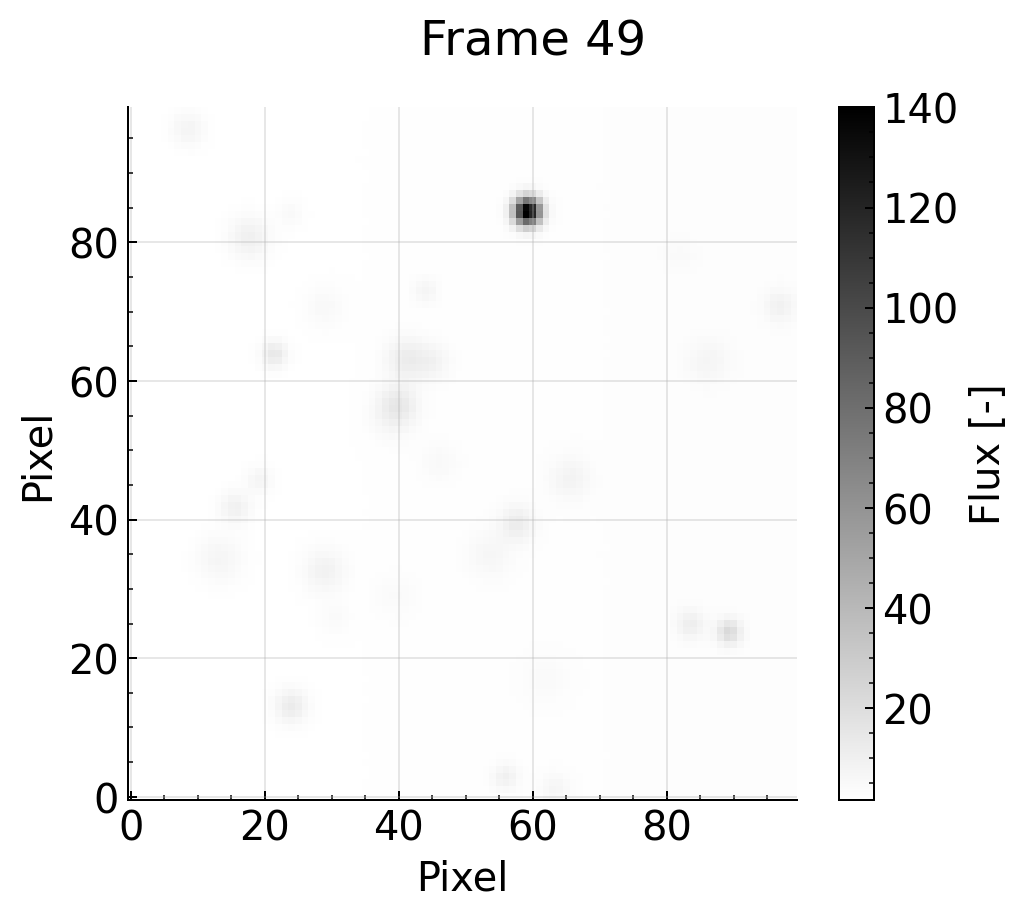

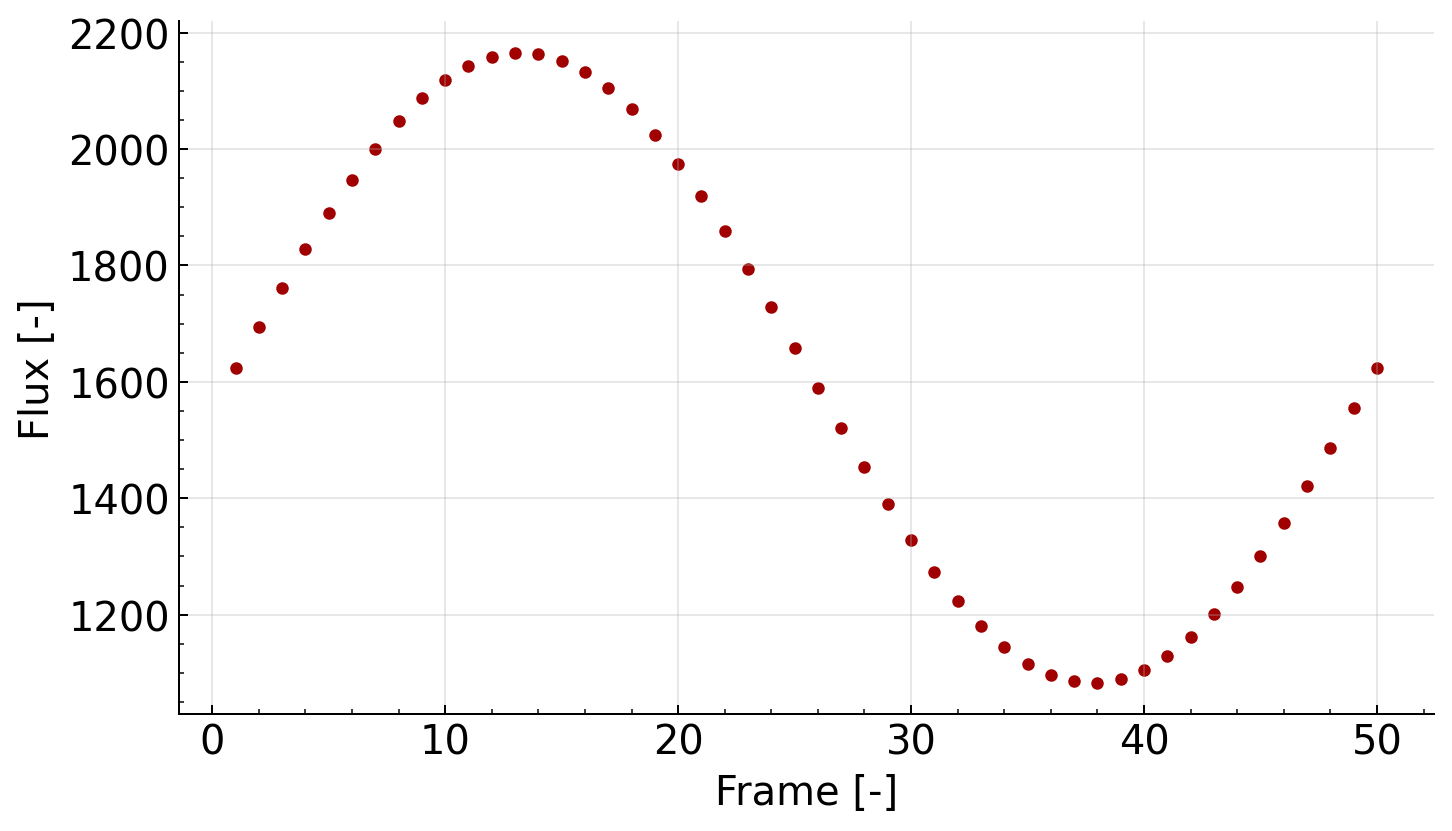

In [6]:
importlib.reload(alsyim)

#define variability of magnitudes over time
def mf_var(tp, fm):
    period = 100
    amp    = 7
    rperiods = np.random.uniform(40, 50, size=fm[:-1].shape)
    ramps    = np.random.uniform(.1, 2,  size=rperiods.shape)
    
    fm[-1]  *= amp*(np.sin(2*np.pi*tp/period)+3) + 2E-3*np.random.randn(1)
    fm[:-1] *= ramps*(np.sin(2*np.pi*tp/rperiods)+2) + 1E-3*np.random.randn(*fm[:-1].shape)

    return fm

times = np.linspace(0,100,50)

TPFS = alsyim.TPF_Series(
    size=100,
    mode='flux',
    # mode='mag',
    f_ref=1, m_ref=0,
    rng=None,
    verbose=0    
)
print(TPFS)


frames, starparams_s = TPFS.rvs(
    times=times,
    variability=mf_var,
    add_stars_kwargs=dict(
        nstars=30,
        posx    ={'dist':'uniform', 'params':[1, 100]},
        posy    ={'dist':'uniform', 'params':[1, 100]},
        f       ={'dist':'uniform', 'params':[20,80]},
        m       ={'dist':'uniform', 'params':[13,23]},
        aperture={'dist':'uniform', 'params':[4, 8]},
    ),
    add_noise_kwargs=dict(amplitude=5E-1, bias=1E-1),
    add_custom_kwargs=dict(trend='linearx', amplitude=1.5),
)

fig, axs, anim = TPFS.plot_result(
    save='../_gfx/tpfseries_flux.gif',
    # pcolormesh_kwargs=dict(vmin=0, vmax=3),
)


#plot pure star LC of last target (variability)
print(starparams_s[:,-1,-1])
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(starparams_s[:,-1,-1], starparams_s[:,-1,2])
ax1.set_xlabel('Frame [-]')
ax1.set_ylabel('Flux [-]')
plt.show()